# Examen: Propiedades de Muestra Finita de los Estimadores de Impacto de una Política

**Objetivo:** Usar simulaciones de Monte Carlo (1,000 replicaciones) para investigar propiedades de muestra finita de distintos estimadores de tratamiento.

**Métricas evaluadas:**
- Sesgo
- Varianza
- Error Medio Cuadrático (MSE)
- Tasa de cobertura de intervalos de confianza al 95%

## Configuración inicial

In [1]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Importar funciones del módulo utils
from utils import (
    # Generación de datos
    generate_dgp_exercise1,
    generate_dgp_exercise2,
    generate_dgp_exercise3,
    generate_dgp_exercise4,
    # Estimadores
    estimate_diff_means,
    estimate_ols_ate,
    estimate_psm,
    estimate_2sls,
    estimate_did,
    # Métricas
    calculate_monte_carlo_stats,
    # Visualización
    create_results_table,
    plot_estimates_distribution,
    create_comparison_table
)

# Configurar estilo de gráficos
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Semilla para reproducibilidad (usar últimos 5 dígitos del documento)
# IMPORTANTE: Cambiar este valor por tus últimos 5 dígitos
SEED = 12345
np.random.seed(SEED)

# Número de replicaciones Monte Carlo
N_REPLICATIONS = 1000

print("✓ Configuración completada")
print(f"✓ Semilla: {SEED}")
print(f"✓ Replicaciones: {N_REPLICATIONS}")

✓ Configuración completada
✓ Semilla: 12345
✓ Replicaciones: 1000


---
# Ejercicio 1: Diferencia de Medias vs. Regresión OLS

**Objetivo:** Comparar el desempeño de estimadores con y sin ajuste por covariables bajo selección sobre observables.

**DGP:**
- $X \sim N(0,1)$
- $D = \mathbb{1}\{X + \epsilon > 0\}$, donde $\epsilon \sim N(0,1)$ (sesgo de selección)
- $Y = 2 + 3D + 2X + u$, donde $u \sim N(0,1)$
- **ATE verdadero = 3**

**Estimadores:**
1. Diferencia en medias (naive): $\hat{\tau}_{DM} = \bar{Y}(D=1) - \bar{Y}(D=0)$
2. OLS ajustado: $Y = \beta_0 + \beta_1 D + \beta_2 X + \varepsilon$, donde $\hat{\tau}_{OLS} = \hat{\beta}_1$

## 1.1 Simulación con N=100

In [2]:
# Simulación Monte Carlo para N=100
N = 100
TRUE_ATE_EX1 = 3.0

# Almacenar resultados
estimates_dm_100 = []
se_dm_100 = []
estimates_ols_100 = []
se_ols_100 = []

print(f"Ejecutando {N_REPLICATIONS} replicaciones para N={N}...")

for r in tqdm(range(N_REPLICATIONS)):
    # Generar datos
    seed_r = SEED + r
    data = generate_dgp_exercise1(n=N, seed=seed_r)
    
    # Estimar con diferencia en medias
    result_dm = estimate_diff_means(data['Y'], data['D'])
    estimates_dm_100.append(result_dm['ate'])
    se_dm_100.append(result_dm['se'])
    
    # Estimar con OLS ajustado
    result_ols = estimate_ols_ate(data['Y'], data['D'], data['X'])
    estimates_ols_100.append(result_ols['ate'])
    se_ols_100.append(result_ols['se'])

# Convertir a arrays
estimates_dm_100 = np.array(estimates_dm_100)
se_dm_100 = np.array(se_dm_100)
estimates_ols_100 = np.array(estimates_ols_100)
se_ols_100 = np.array(se_ols_100)

print("✓ Simulación completada para N=100")

Ejecutando 1000 replicaciones para N=100...


100%|██████████| 1000/1000 [00:00<00:00, 1054.94it/s]

✓ Simulación completada para N=100


### Resultados para N=100

In [3]:
# Calcular métricas Monte Carlo
stats_dm_100 = calculate_monte_carlo_stats(estimates_dm_100, se_dm_100, TRUE_ATE_EX1)
stats_ols_100 = calculate_monte_carlo_stats(estimates_ols_100, se_ols_100, TRUE_ATE_EX1)

# Crear tabla de resultados
results_ex1_n100 = {
    'Diferencia en medias': stats_dm_100,
    'OLS ajustado': stats_ols_100
}

table_ex1_n100 = create_results_table(results_ex1_n100)
print("\nRESULTADOS EJERCICIO 1 (N=100)")
print("="*80)
print(table_ex1_n100.to_string(index=False))
print("="*80)


RESULTADOS EJERCICIO 1 (N=100)
           Estimador  Sesgo  Varianza    MSE  Cobertura    N
        OLS ajustado 0.0002    0.0616 0.0615      0.945 1000
Diferencia en medias 2.2742    0.1500 5.3219      0.000 1000


## 1.2 Simulación con N=200

In [4]:
# Simulación Monte Carlo para N=200
N = 200

# Almacenar resultados
estimates_dm_200 = []
se_dm_200 = []
estimates_ols_200 = []
se_ols_200 = []

print(f"Ejecutando {N_REPLICATIONS} replicaciones para N={N}...")

for r in tqdm(range(N_REPLICATIONS)):
    # Generar datos
    seed_r = SEED + 10000 + r  # Offset para evitar solapamiento con N=100
    data = generate_dgp_exercise1(n=N, seed=seed_r)
    
    # Estimar con diferencia en medias
    result_dm = estimate_diff_means(data['Y'], data['D'])
    estimates_dm_200.append(result_dm['ate'])
    se_dm_200.append(result_dm['se'])
    
    # Estimar con OLS ajustado
    result_ols = estimate_ols_ate(data['Y'], data['D'], data['X'])
    estimates_ols_200.append(result_ols['ate'])
    se_ols_200.append(result_ols['se'])

# Convertir a arrays
estimates_dm_200 = np.array(estimates_dm_200)
se_dm_200 = np.array(se_dm_200)
estimates_ols_200 = np.array(estimates_ols_200)
se_ols_200 = np.array(se_ols_200)

print("✓ Simulación completada para N=200")

Ejecutando 1000 replicaciones para N=200...


100%|██████████| 1000/1000 [00:00<00:00, 1125.57it/s]

✓ Simulación completada para N=200


### Resultados para N=200

In [5]:
# Calcular métricas Monte Carlo
stats_dm_200 = calculate_monte_carlo_stats(estimates_dm_200, se_dm_200, TRUE_ATE_EX1)
stats_ols_200 = calculate_monte_carlo_stats(estimates_ols_200, se_ols_200, TRUE_ATE_EX1)

# Crear tabla de resultados
results_ex1_n200 = {
    'Diferencia en medias': stats_dm_200,
    'OLS ajustado': stats_ols_200
}

table_ex1_n200 = create_results_table(results_ex1_n200)
print("\nRESULTADOS EJERCICIO 1 (N=200)")
print("="*80)
print(table_ex1_n200.to_string(index=False))
print("="*80)


RESULTADOS EJERCICIO 1 (N=200)
           Estimador   Sesgo  Varianza    MSE  Cobertura    N
        OLS ajustado -0.0059    0.0309 0.0309       0.95 1000
Diferencia en medias  2.2499    0.0779 5.1399       0.00 1000


## 1.3 Visualización de resultados

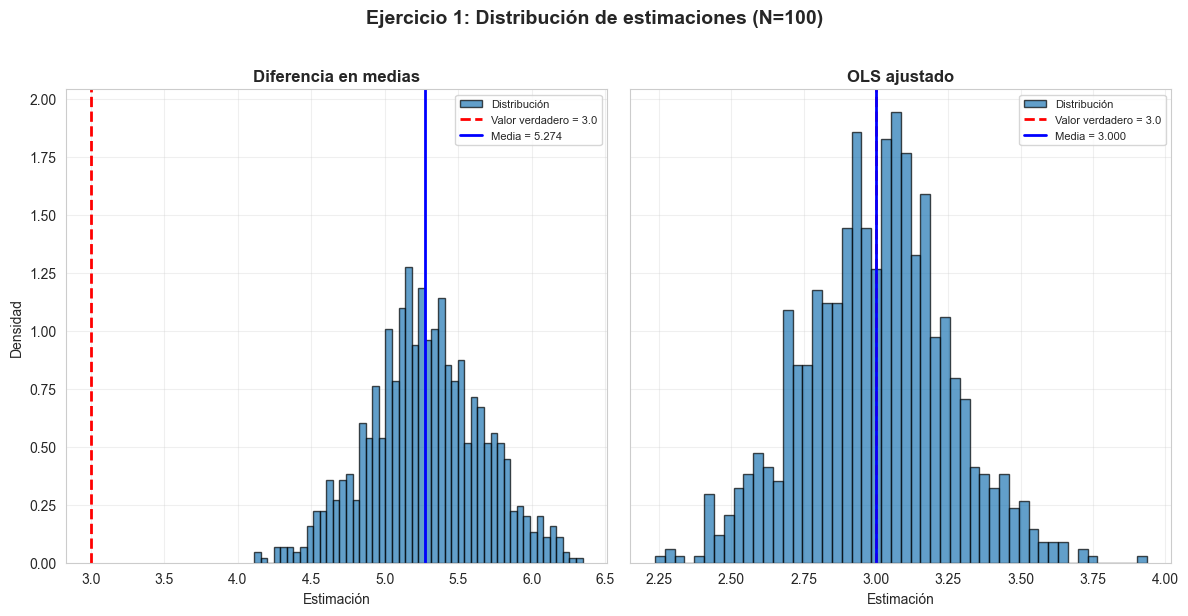

In [6]:
# Graficar distribuciones para N=100
estimates_dict_100 = {
    'Diferencia en medias': estimates_dm_100,
    'OLS ajustado': estimates_ols_100
}

fig1 = plot_estimates_distribution(
    estimates_dict_100, 
    TRUE_ATE_EX1, 
    title='Ejercicio 1: Distribución de estimaciones (N=100)'
)
plt.show()

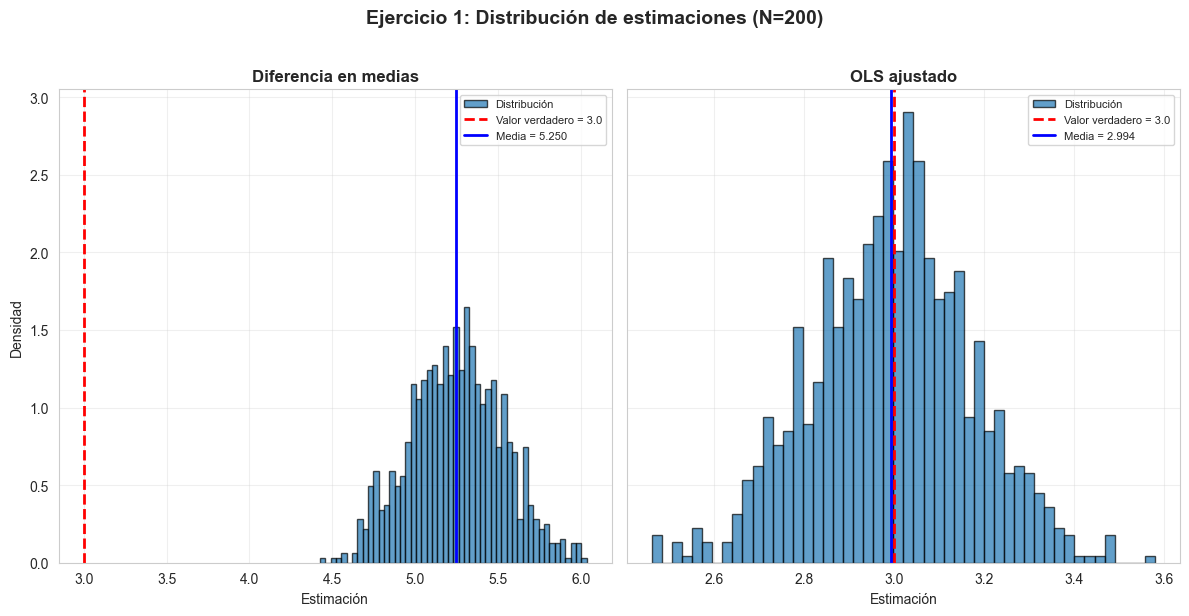

In [7]:
# Graficar distribuciones para N=200
estimates_dict_200 = {
    'Diferencia en medias': estimates_dm_200,
    'OLS ajustado': estimates_ols_200
}

fig2 = plot_estimates_distribution(
    estimates_dict_200, 
    TRUE_ATE_EX1, 
    title='Ejercicio 1: Distribución de estimaciones (N=200)'
)
plt.show()

## 1.4 Interpretación

**Preguntas a responder:**

1. **¿Por qué la diferencia en medias tiene sesgo?**
   - *Respuesta:* [Explicar que existe sesgo de selección porque D depende de X, y X también afecta a Y]

2. **¿Qué supuesto permite que OLS identifique el ATE?**
   - *Respuesta:* [Independencia condicional: $(Y_1, Y_0) \perp D | X$]

3. **¿Cómo cambian las métricas al aumentar N de 100 a 200?**
   - *Respuesta:* [Discutir reducción en varianza y MSE, mientras el sesgo se mantiene similar para diferencia en medias]

4. **¿Qué estimador tiene mejor cobertura y por qué?**
   - *Respuesta:* [OLS ajustado debería tener cobertura cercana a 0.95 porque es insesgado bajo CIA]

---
# Ejercicio 2: Propensity Score Matching (PSM)

**Objetivo:** Examinar el desempeño de estimadores de emparejamiento bajo independencia condicional.

**DGP:**
- $X_1 \sim N(0,1)$, $X_2 \sim \text{Bernoulli}(0.5)$
- $P(D=1|X) = \frac{1}{1+\exp(-(0.5+X_1+2X_2))}$
- $D \sim \text{Bernoulli}(P(D=1|X))$
- $Y = 1 + 4D + X_1 + 3X_2 + u$, donde $u \sim N(0,1)$
- **ATE verdadero = 4**

**Estimador:** Nearest-neighbor matching 1:1 con reemplazo, usando errores estándar bootstrap (200 réplicas).

## 2.1 Simulación con N=100

In [8]:
# Simulación Monte Carlo para PSM con N=100
N = 100
TRUE_ATE_EX2 = 4.0
N_BOOTSTRAP = 200

# Almacenar resultados
estimates_psm_100 = []
se_psm_100 = []

print(f"Ejecutando {N_REPLICATIONS} replicaciones con PSM para N={N}...")
print(f"(Cada replicación incluye {N_BOOTSTRAP} bootstraps, puede tardar)")

for r in tqdm(range(N_REPLICATIONS)):
    # Generar datos
    seed_r = SEED + 20000 + r
    data = generate_dgp_exercise2(n=N, seed=seed_r)
    
    # Estimar con PSM
    result_psm = estimate_psm(
        data['Y'], 
        data['D'], 
        data['X1'], 
        data['X2'],
        n_bootstrap=N_BOOTSTRAP,
        seed=seed_r
    )
    
    estimates_psm_100.append(result_psm['ate'])
    se_psm_100.append(result_psm['se'])

# Convertir a arrays
estimates_psm_100 = np.array(estimates_psm_100)
se_psm_100 = np.array(se_psm_100)

print("✓ Simulación PSM completada para N=100")

Ejecutando 1000 replicaciones con PSM para N=100...
(Cada replicación incluye 200 bootstraps, puede tardar)


  0%|          | 0/1000 [00:00<?, ?it/s]c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

LinAlgError: Singular matrix

### Resultados para N=100

In [ ]:
# Calcular métricas Monte Carlo
stats_psm_100 = calculate_monte_carlo_stats(estimates_psm_100, se_psm_100, TRUE_ATE_EX2)

# Crear tabla de resultados
results_ex2_n100 = {
    'PSM (NN 1:1 con reemplazo)': stats_psm_100
}

table_ex2_n100 = create_results_table(results_ex2_n100)
print("\nRESULTADOS EJERCICIO 2 (N=100)")
print("="*80)
print(table_ex2_n100.to_string(index=False))
print("="*80)

## 2.2 Simulación con N=200

In [ ]:
# Simulación Monte Carlo para PSM con N=200
N = 200

# Almacenar resultados
estimates_psm_200 = []
se_psm_200 = []

print(f"Ejecutando {N_REPLICATIONS} replicaciones con PSM para N={N}...")

for r in tqdm(range(N_REPLICATIONS)):
    # Generar datos
    seed_r = SEED + 30000 + r
    data = generate_dgp_exercise2(n=N, seed=seed_r)
    
    # Estimar con PSM
    result_psm = estimate_psm(
        data['Y'], 
        data['D'], 
        data['X1'], 
        data['X2'],
        n_bootstrap=N_BOOTSTRAP,
        seed=seed_r
    )
    
    estimates_psm_200.append(result_psm['ate'])
    se_psm_200.append(result_psm['se'])

# Convertir a arrays
estimates_psm_200 = np.array(estimates_psm_200)
se_psm_200 = np.array(se_psm_200)

print("✓ Simulación PSM completada para N=200")

### Resultados para N=200

In [ ]:
# Calcular métricas Monte Carlo
stats_psm_200 = calculate_monte_carlo_stats(estimates_psm_200, se_psm_200, TRUE_ATE_EX2)

# Crear tabla de resultados
results_ex2_n200 = {
    'PSM (NN 1:1 con reemplazo)': stats_psm_200
}

table_ex2_n200 = create_results_table(results_ex2_n200)
print("\nRESULTADOS EJERCICIO 2 (N=200)")
print("="*80)
print(table_ex2_n200.to_string(index=False))
print("="*80)

## 2.3 Interpretación

**Preguntas a responder:**

1. **¿Cómo se compara PSM con el OLS ajustado del Ejercicio 1?**
   - *Respuesta:* [Comparar sesgo, varianza y MSE]

2. **¿Cómo afecta el desbalance en muestras pequeñas?**
   - *Respuesta:* [Discutir cómo matching puede tener menor soporte común y mayor varianza]

3. **¿Mejora la precisión con N=200?**
   - *Respuesta:* [Analizar reducción en varianza y MSE]

---
# Ejercicio 3: Variables Instrumentales (IV)

**Objetivo:** Simular problemas de instrumentos débiles y 2SLS en muestras pequeñas.

**DGP:**
- $Z \sim \text{Bernoulli}(0.5)$ (instrumento)
- $X \sim N(0,1)$ (covariable)
- $D = 0.2 + \gamma Z + 0.5X + v$, donde $v \sim N(0,1)$
  - Instrumento **fuerte**: $\gamma = 0.3$
  - Instrumento **débil**: $\gamma = 0.05$
- $u = 0.8v + \varepsilon$, donde $\varepsilon \sim N(0,1)$ (endogeneidad)
- $Y = 5 + 2D + X + u$
- **ATE verdadero = 2**

**Estimadores:**
1. OLS naive (sesgado)
2. 2SLS con instrumento fuerte
3. 2SLS con instrumento débil

## 3.1 Simulación con instrumento fuerte (N=100)

In [9]:
# Simulación Monte Carlo para IV con N=100 (instrumento fuerte)
N = 100
TRUE_ATE_EX3 = 2.0

# Almacenar resultados
estimates_ols_naive = []
estimates_2sls_strong = []
se_2sls_strong = []
f_stats_strong = []

print(f"Ejecutando {N_REPLICATIONS} replicaciones con IV (instrumento fuerte)...")

for r in tqdm(range(N_REPLICATIONS)):
    # Generar datos con instrumento fuerte
    seed_r = SEED + 40000 + r
    data = generate_dgp_exercise3(n=N, seed=seed_r, weak_instrument=False)
    
    # Estimar con 2SLS
    result_iv = estimate_2sls(
        data['Y'],
        data['D'],
        data['Z'],
        data['X']
    )
    
    estimates_ols_naive.append(result_iv['ate_ols'])
    estimates_2sls_strong.append(result_iv['ate_2sls'])
    se_2sls_strong.append(result_iv['se_2sls'])
    f_stats_strong.append(result_iv['first_stage_f'])

# Convertir a arrays
estimates_ols_naive = np.array(estimates_ols_naive)
estimates_2sls_strong = np.array(estimates_2sls_strong)
se_2sls_strong = np.array(se_2sls_strong)
f_stats_strong = np.array(f_stats_strong)

print("✓ Simulación IV (instrumento fuerte) completada")
print(f"  Estadístico F promedio (primera etapa): {f_stats_strong.mean():.2f}")

Ejecutando 1000 replicaciones con IV (instrumento fuerte)...


100%|██████████| 1000/1000 [00:02<00:00, 450.76it/s]

✓ Simulación IV (instrumento fuerte) completada
  Estadístico F promedio (primera etapa): 3.39


## 3.2 Simulación con instrumento débil (N=100)

In [10]:
# Simulación Monte Carlo para IV con N=100 (instrumento débil)

# Almacenar resultados
estimates_2sls_weak = []
se_2sls_weak = []
f_stats_weak = []

print(f"Ejecutando {N_REPLICATIONS} replicaciones con IV (instrumento débil)...")

for r in tqdm(range(N_REPLICATIONS)):
    # Generar datos con instrumento débil
    seed_r = SEED + 50000 + r
    data = generate_dgp_exercise3(n=N, seed=seed_r, weak_instrument=True)
    
    # Estimar con 2SLS
    result_iv = estimate_2sls(
        data['Y'],
        data['D'],
        data['Z'],
        data['X']
    )
    
    estimates_2sls_weak.append(result_iv['ate_2sls'])
    se_2sls_weak.append(result_iv['se_2sls'])
    f_stats_weak.append(result_iv['first_stage_f'])

# Convertir a arrays
estimates_2sls_weak = np.array(estimates_2sls_weak)
se_2sls_weak = np.array(se_2sls_weak)
f_stats_weak = np.array(f_stats_weak)

print("✓ Simulación IV (instrumento débil) completada")
print(f"  Estadístico F promedio (primera etapa): {f_stats_weak.mean():.2f}")

Ejecutando 1000 replicaciones con IV (instrumento débil)...


100%|██████████| 1000/1000 [00:01<00:00, 597.95it/s]

✓ Simulación IV (instrumento débil) completada
  Estadístico F promedio (primera etapa): 1.09


### Resultados comparativos

In [11]:
# Calcular métricas Monte Carlo
# OLS naive (no tiene SE válidos para coverage, usamos placeholder)
stats_ols_naive = calculate_monte_carlo_stats(
    estimates_ols_naive, 
    np.ones_like(estimates_ols_naive),  # Placeholder
    TRUE_ATE_EX3
)

stats_2sls_strong = calculate_monte_carlo_stats(
    estimates_2sls_strong, 
    se_2sls_strong, 
    TRUE_ATE_EX3
)

stats_2sls_weak = calculate_monte_carlo_stats(
    estimates_2sls_weak, 
    se_2sls_weak, 
    TRUE_ATE_EX3
)

# Agregar F-stats a los resultados
stats_2sls_strong['f_stat_mean'] = f_stats_strong.mean()
stats_2sls_weak['f_stat_mean'] = f_stats_weak.mean()

# Crear tabla de resultados
results_ex3 = {
    'OLS naive (sesgado)': stats_ols_naive,
    '2SLS (instrumento fuerte)': stats_2sls_strong,
    '2SLS (instrumento débil)': stats_2sls_weak
}

table_ex3 = create_results_table(results_ex3)
print("\nRESULTADOS EJERCICIO 3 (N=100)")
print("="*80)
print(table_ex3.to_string(index=False))
print("\nEstadísticos F de primera etapa:")
print(f"  Instrumento fuerte: F = {f_stats_strong.mean():.2f}")
print(f"  Instrumento débil:  F = {f_stats_weak.mean():.2f}")
print("  (Regla práctica: F > 10 indica instrumento suficientemente fuerte)")
print("="*80)


RESULTADOS EJERCICIO 3 (N=100)
                Estimador   Sesgo   Varianza        MSE  Cobertura    N
      OLS naive (sesgado)  0.7810     0.0103     0.6202      1.000 1000
2SLS (instrumento fuerte)  0.0220   173.4892   173.3161      0.946 1000
 2SLS (instrumento débil) -9.4682 75545.2077 75559.3100      0.963 1000

Estadísticos F de primera etapa:
  Instrumento fuerte: F = 3.39
  Instrumento débil:  F = 1.09
  (Regla práctica: F > 10 indica instrumento suficientemente fuerte)


## 3.3 Interpretación

**Preguntas a responder:**

1. **¿Por qué OLS naive está sesgado?**
   - *Respuesta:* [Endogeneidad: $\text{Cov}(D, u) \neq 0$ porque ambos dependen de $v$]

2. **¿Cómo afecta la debilidad del instrumento al estimador 2SLS?**
   - *Respuesta:* [Mayor sesgo, mayor varianza, peor cobertura]

3. **¿Qué indica el estadístico F de primera etapa?**
   - *Respuesta:* [F > 10 sugiere instrumento suficientemente fuerte; F < 10 indica problemas de instrumentos débiles]

---
# Ejercicio 4: Diferencia-en-Diferencias (DID)

**Objetivo:** Evaluar violaciones del supuesto de tendencias paralelas en muestras pequeñas.

**DGP (Panel 2 períodos):**
- $N=100$ unidades, $T=2$ períodos
- $\alpha_i \sim N(0,1)$ (efectos fijos)
- $X_{it} \sim N(0,1)$
- $D_{it} = 1$ si unidad está en grupo tratamiento y $t=2$
- **Sin violación**: $\lambda_t = 0$ para todos
- **Con violación**: $\lambda_t = 0.5t$ para tratados, $0$ para control (pre-tendencia)
- $Y_{it} = \alpha_i + \lambda_t + 1.5 D_{it} + 2X_{it} + u_{it}$
- **ATT verdadero = 1.5**

**Estimador:** DID con regresión y errores clustered a nivel de unidad.

## 4.1 Simulación sin violación de tendencias paralelas

In [12]:
# Simulación Monte Carlo para DID sin violación (N=100 unidades)
N = 100
TRUE_ATT_EX4 = 1.5

# Almacenar resultados
estimates_did_simple_base = []
estimates_did_reg_base = []
se_did_reg_base = []

print(f"Ejecutando {N_REPLICATIONS} replicaciones DID (sin violación)...")

for r in tqdm(range(N_REPLICATIONS)):
    # Generar datos sin violación
    seed_r = SEED + 60000 + r
    df = generate_dgp_exercise4(n=N, seed=seed_r, violate_parallel_trends=False)
    
    # Estimar DID
    result_did = estimate_did(df)
    
    estimates_did_simple_base.append(result_did['att_simple'])
    estimates_did_reg_base.append(result_did['att_regression'])
    se_did_reg_base.append(result_did['se'])

# Convertir a arrays
estimates_did_simple_base = np.array(estimates_did_simple_base)
estimates_did_reg_base = np.array(estimates_did_reg_base)
se_did_reg_base = np.array(se_did_reg_base)

print("✓ Simulación DID (sin violación) completada")

Ejecutando 1000 replicaciones DID (sin violación)...


100%|██████████| 1000/1000 [00:09<00:00, 109.92it/s]

✓ Simulación DID (sin violación) completada


## 4.2 Simulación con violación de tendencias paralelas

In [13]:
# Simulación Monte Carlo para DID con violación (N=100 unidades)

# Almacenar resultados
estimates_did_simple_viol = []
estimates_did_reg_viol = []
se_did_reg_viol = []

print(f"Ejecutando {N_REPLICATIONS} replicaciones DID (con violación)...")

for r in tqdm(range(N_REPLICATIONS)):
    # Generar datos con violación
    seed_r = SEED + 70000 + r
    df = generate_dgp_exercise4(n=N, seed=seed_r, violate_parallel_trends=True)
    
    # Estimar DID
    result_did = estimate_did(df)
    
    estimates_did_simple_viol.append(result_did['att_simple'])
    estimates_did_reg_viol.append(result_did['att_regression'])
    se_did_reg_viol.append(result_did['se'])

# Convertir a arrays
estimates_did_simple_viol = np.array(estimates_did_simple_viol)
estimates_did_reg_viol = np.array(estimates_did_reg_viol)
se_did_reg_viol = np.array(se_did_reg_viol)

print("✓ Simulación DID (con violación) completada")

Ejecutando 1000 replicaciones DID (con violación)...


100%|██████████| 1000/1000 [00:08<00:00, 114.51it/s]

✓ Simulación DID (con violación) completada


### Resultados comparativos

In [14]:
# Calcular métricas Monte Carlo
stats_did_base = calculate_monte_carlo_stats(
    estimates_did_reg_base, 
    se_did_reg_base, 
    TRUE_ATT_EX4
)

stats_did_viol = calculate_monte_carlo_stats(
    estimates_did_reg_viol, 
    se_did_reg_viol, 
    TRUE_ATT_EX4
)

# Crear tabla de resultados
results_ex4 = {
    'DID (tendencias paralelas válidas)': stats_did_base,
    'DID (violación de tendencias)': stats_did_viol
}

table_ex4 = create_results_table(results_ex4)
print("\nRESULTADOS EJERCICIO 4 (N=100 unidades)")
print("="*80)
print(table_ex4.to_string(index=False))
print("="*80)


RESULTADOS EJERCICIO 4 (N=100 unidades)
                         Estimador   Sesgo  Varianza    MSE  Cobertura    N
DID (tendencias paralelas válidas) -0.0057    0.0799 0.0799      0.941 1000
     DID (violación de tendencias)  0.4993    0.0810 0.3303      0.587 1000


## 4.3 Interpretación

**Preguntas a responder:**

1. **¿Qué pasa con el sesgo al violar tendencias paralelas?**
   - *Respuesta:* [El sesgo aumenta significativamente porque DID atribuye la pre-tendencia al tratamiento]

2. **¿Cómo cambian las métricas con la violación?**
   - *Respuesta:* [MSE aumenta, cobertura se deteriora]

3. **¿Por qué son importantes los errores clustered?**
   - *Respuesta:* [Porque las observaciones del mismo individuo están correlacionadas a través del tiempo]

---
# Ejercicio 5: Síntesis y Comparación

**Objetivo:** Comparar todos los estimadores en términos de propiedades de muestra finita.

## 5.1 Tabla comparativa consolidada (N=100)

In [15]:
# Consolidar todos los resultados para N=100
all_results = {
    'Ejercicio 1': {
        'Diferencia en medias': stats_dm_100,
        'OLS ajustado': stats_ols_100
    },
    'Ejercicio 2': {
        'PSM': stats_psm_100
    },
    'Ejercicio 3': {
        'OLS naive': stats_ols_naive,
        '2SLS fuerte': stats_2sls_strong,
        '2SLS débil': stats_2sls_weak
    },
    'Ejercicio 4': {
        'DID base': stats_did_base,
        'DID violación': stats_did_viol
    }
}

# Crear tabla consolidada
tabla_final = create_comparison_table(all_results)
print("\n" + "="*100)
print("TABLA COMPARATIVA FINAL - TODOS LOS ESTIMADORES (N=100)")
print("="*100)
print(tabla_final.to_string(index=False))
print("="*100)

NameError: name 'stats_psm_100' is not defined

## 5.2 Análisis comparativo

**1. ¿Qué estimador tiene mejor desempeño en muestras pequeñas (N=100)?**

*Respuesta:* [Analizar cuál tiene menor MSE y mejor cobertura]

---

**2. ¿Qué estimador tiene peor desempeño?**

*Respuesta:* [Probablemente 2SLS con instrumento débil o DID con violación]

---

**3. Trade-off sesgo-varianza**

*Respuesta:* [Discutir qué estimadores tienen más sesgo vs. más varianza]

---

**4. Sensibilidad a supuestos**

*Respuesta:* [Discutir cómo cada estimador es sensible a violaciones de sus supuestos de identificación]

---

**5. Implicaciones prácticas**

*Respuesta:* [¿Cuándo simulaciones como estas pueden orientar decisiones empíricas reales?]

- Ayudan a entender qué esperar en muestras pequeñas
- Ilustran importancia de verificar supuestos (tendencias paralelas, fuerza de instrumentos, etc.)
- Muestran que no existe "mejor estimador universal" - depende del contexto y cumplimiento de supuestos

## 5.3 Visualización final

In [ ]:
# Comparación visual de MSE
import matplotlib.pyplot as plt

estimadores = [
    'Diff-Means',
    'OLS',
    'PSM',
    'OLS naive',
    '2SLS fuerte',
    '2SLS débil',
    'DID base',
    'DID violación'
]

mse_values = [
    stats_dm_100['mse'],
    stats_ols_100['mse'],
    stats_psm_100['mse'],
    stats_ols_naive['mse'],
    stats_2sls_strong['mse'],
    stats_2sls_weak['mse'],
    stats_did_base['mse'],
    stats_did_viol['mse']
]

# Gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
colors = ['#1f77b4', '#1f77b4', '#ff7f0e', '#d62728', '#2ca02c', '#2ca02c', '#9467bd', '#9467bd']
bars = ax.bar(estimadores, mse_values, color=colors, alpha=0.7, edgecolor='black')

ax.set_ylabel('MSE', fontsize=12, fontweight='bold')
ax.set_title('Comparación de MSE por Estimador (N=100)', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

---
## Conclusiones Finales

Este examen ha demostrado cómo las simulaciones de Monte Carlo permiten:

1. **Evaluar propiedades de muestra finita** que van más allá de resultados asintóticos
2. **Comparar estimadores** en condiciones controladas
3. **Identificar sensibilidades** a violaciones de supuestos
4. **Informar decisiones empíricas** sobre qué métodos usar en contextos reales

**Lecciones clave:**
- El ajuste por covariables (OLS, PSM) reduce sesgo bajo independencia condicional
- Los instrumentos débiles amplifican problemas de sesgo y varianza en 2SLS
- La violación de tendencias paralelas invalida DID
- No existe un "mejor estimador universal" - la elección depende del contexto y supuestos

**Futuras extensiones:**
- Aumentar N para ver convergencia asintótica
- Probar con DGPs alternativos (no-linealidades, heterogeneidad, etc.)
- Comparar con métodos más recientes (synthetic control, regression discontinuity, etc.)